# Predictive Analysis and Prevention of Cardiovascular Disease Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

# Load the Data

### Data Source

[Data Source References](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data)

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4240, 16)

# Data Acquisition

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Missing Values

Let's check the missing values in the dataset

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Dropping Unnecessary Columns

We drop the `'education'` column due to a high percentage of missing values.


In [7]:
df.drop('education', inplace=True, axis=1)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Correlation Analysis

We calculate and visualize the correlation matrix to identify which features are strongly correlated with the target variable, `TenYearCHD`.


In [8]:
correlation_matrix = df.corr()
correlation_matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369
sysBP,-0.035879,0.394053,-0.130281,-0.088797,0.254194,0.057000,0.696656,0.111265,0.208734,1.000000,0.783952,0.326906,0.182155,0.140573,0.216374


In [9]:
# Extract correlations with 'TenYearCHD'
correlation_with_TenYearCHD = correlation_matrix['TenYearCHD'].sort_values(ascending=False)
correlation_with_TenYearCHD

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64

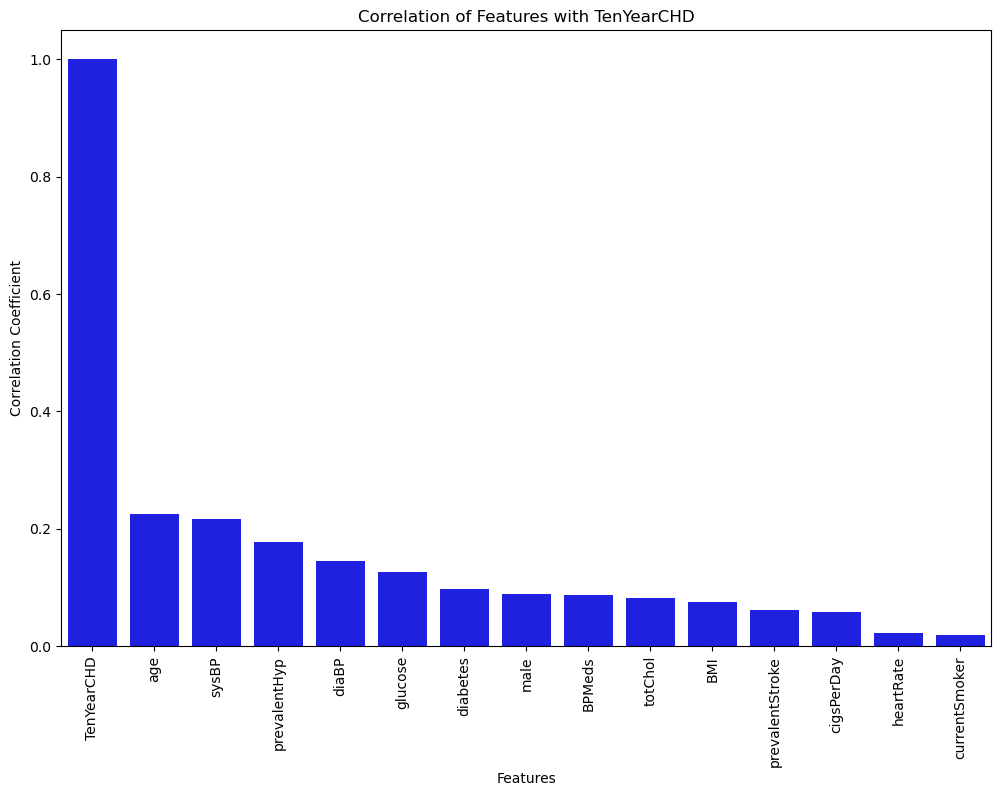

In [10]:
# Plot the correlation values with 'TenYearCHD'
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_TenYearCHD.index, y=correlation_with_TenYearCHD.values, color='b')
plt.xticks(rotation=90)
plt.title('Correlation of Features with TenYearCHD')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


## High Correlation Features

We list the features that exhibit a high correlation with the target variable, `TenYearCHD`.


In [11]:
# Select features with high correlation with 'TenYearCHD'
high_correlation_features = correlation_with_TenYearCHD[abs(correlation_with_TenYearCHD) > 0.1]
print("Highly correlated features: \n", high_correlation_features)

Highly correlated features: 
 TenYearCHD      1.000000
age             0.225408
sysBP           0.216374
prevalentHyp    0.177458
diaBP           0.145112
glucose         0.125590
Name: TenYearCHD, dtype: float64


## Visualizing Key Features

We create box plots to visualize the distribution of the top features with respect to the target variable, `TenYearCHD`.


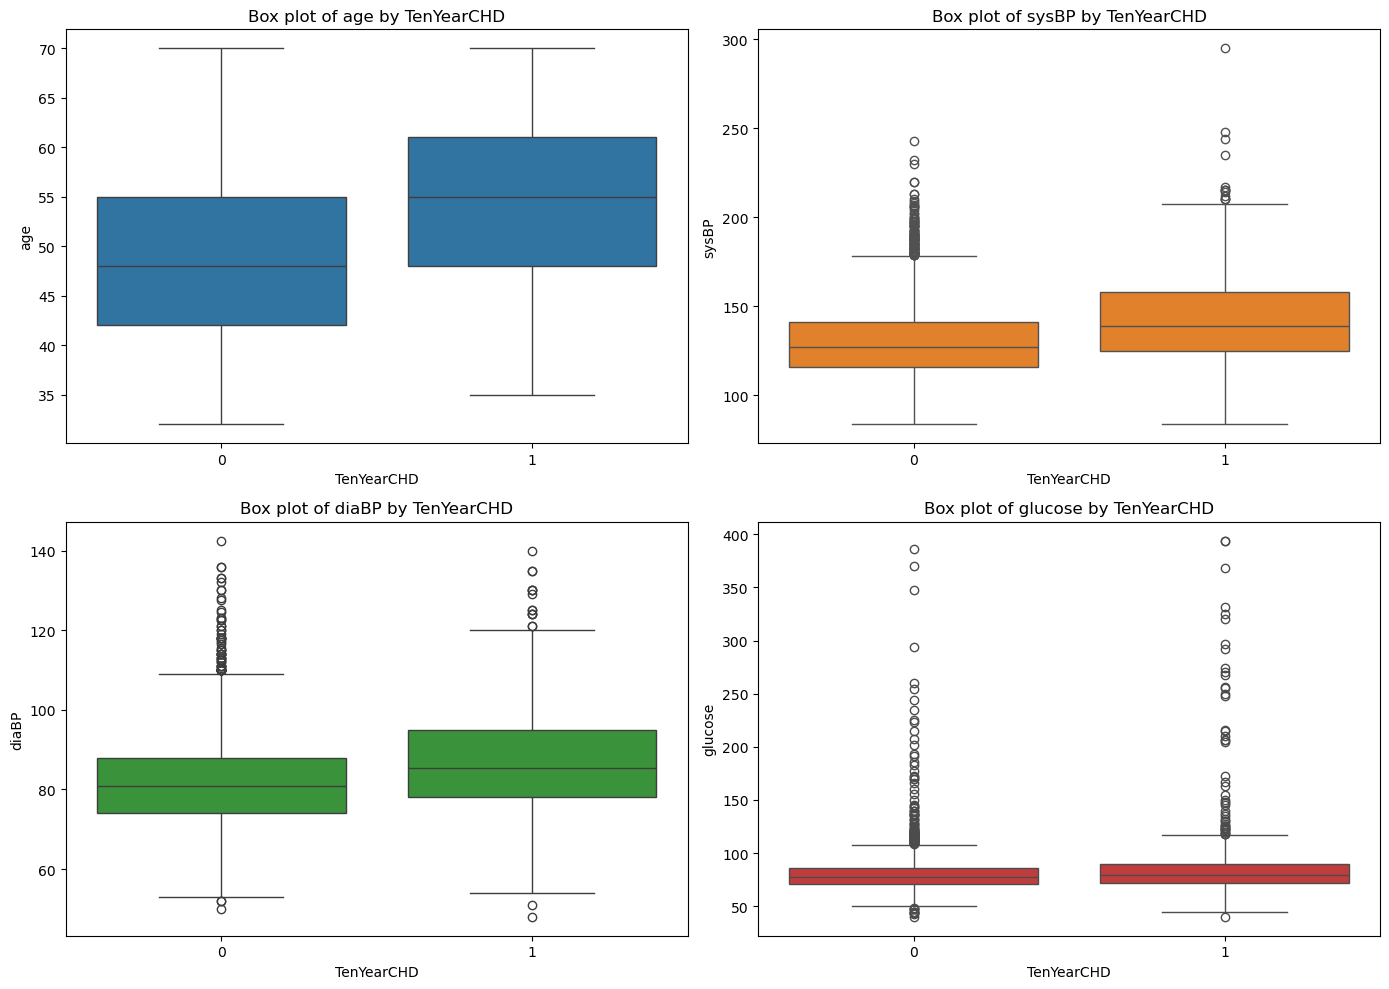

In [12]:
top_4_features = [
    'age',
    'sysBP',
    'diaBP',
    'glucose'
]

# Define a color for each feature
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature with a different color
for i, (feature, color) in enumerate(zip(top_4_features, colors)):
    sns.boxplot(x='TenYearCHD', y=feature, data=df, color=color, ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} by TenYearCHD')
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


## Removing Outliers

Defining a function to remove outliers and apply it to the top features.


In [13]:
def remove_outliers(df, column):
    """Remove outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of top features
top_4_features = [
    'age',
    'sysBP',
    'diaBP',
    'glucose'
]

# Remove outliers for each of the top 4 features
for feature in top_4_features:
    df = remove_outliers(df, feature)

# Verify the data after removing outliers
print(df.describe())


              male          age  currentSmoker   cigsPerDay       BPMeds  \
count  3531.000000  3531.000000    3531.000000  3508.000000  3486.000000   
mean      0.445766    49.169924       0.497310     9.155074     0.022375   
std       0.497120     8.498593       0.500064    12.000257     0.147922   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    48.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      3531.000000   3531.000000  3531.000000  3523.000000  3531.000000   
mean          0.005381      0.279524     0.007080   236.197275   129.624327   
std           0.073167      0.448829     0.083857    44.215041    18.221364   

## Feature Distribution

Let's visualize the distribution of the top features after removing outliers.


### Visualization using Boxplot

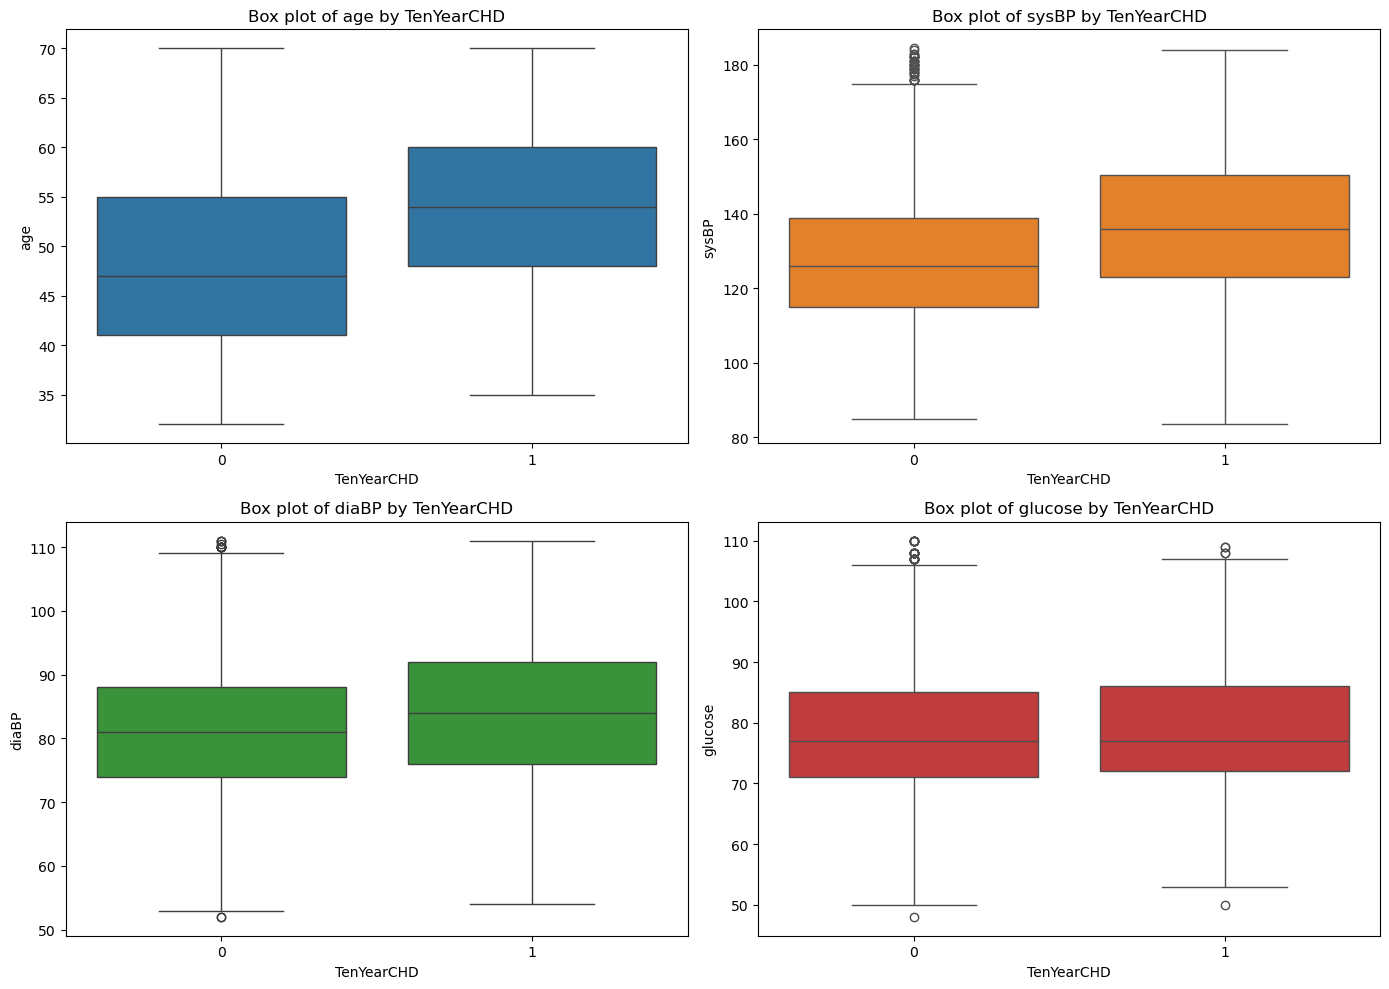

In [14]:
top_4_features = [
    'age',
    'sysBP',
    'diaBP',
    'glucose'
]

# Define a color for each feature
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, (feature, color) in enumerate(zip(top_4_features, colors)):
    sns.boxplot(x='TenYearCHD', y=feature, data=df, color=color, ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} by TenYearCHD')
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


### Visualization using Histogram

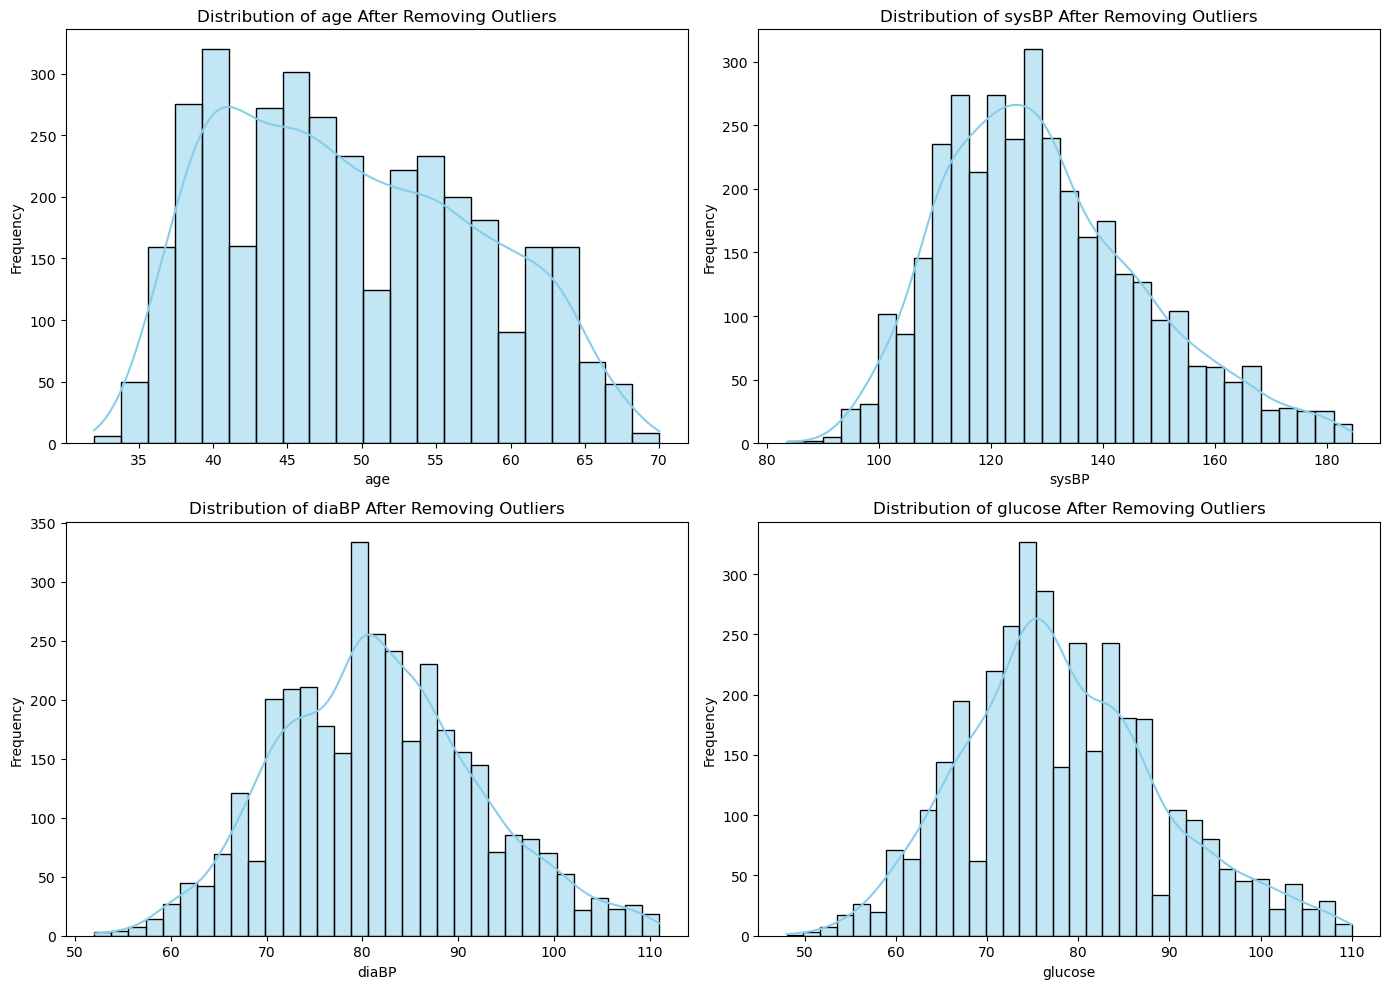

In [15]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each feature
for i, feature in enumerate(top_4_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature} After Removing Outliers')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Treating NaN Values

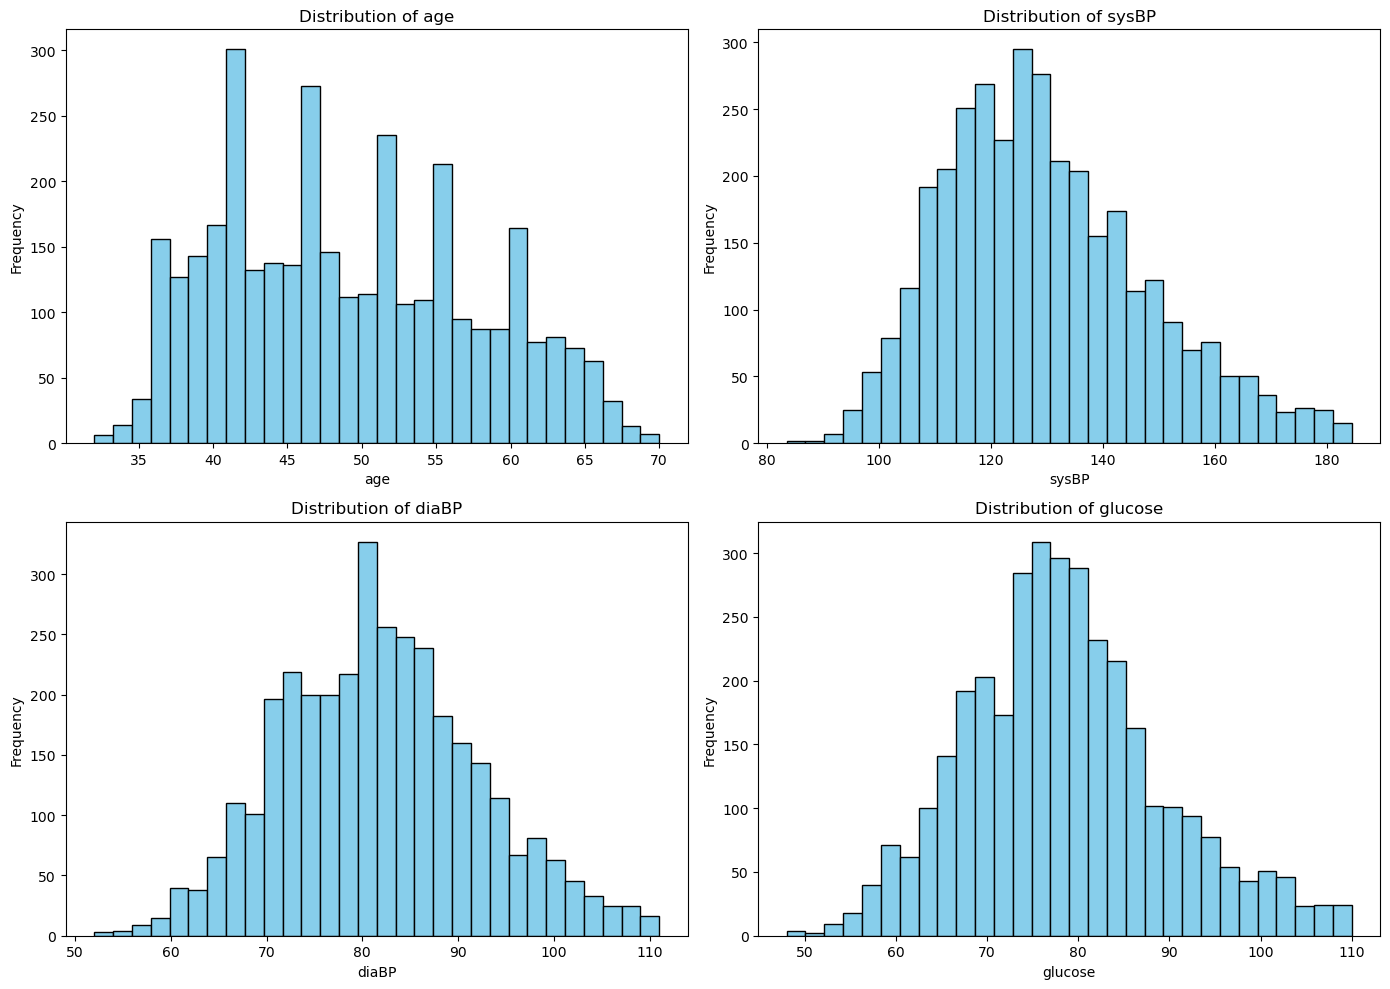

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Replace infinite values with NaN and drop rows with NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  # Remove rows with NaN values

# List of features to plot
top_4_features = ['age', 'sysBP', 'diaBP', 'glucose']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_4_features):
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Handling Missing Values

We handle missing values in the dataset using appropriate methods:

- **Numerical Features**: Missing values in the 'age' column are filled with the median value. Missing values in the 'sysBP', 'diaBP', and 'glucose' columns are filled with the mean value.

### Implementation


In [17]:
# Fill missing values in 'age' with the median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing values in 'sysBP', 'diaBP', and 'glucose' with the mean
df[['sysBP', 'diaBP', 'glucose']] = df[['sysBP', 'diaBP', 'glucose']].fillna(df[['sysBP', 'diaBP', 'glucose']].mean())

# Verify that there are no missing values left
print(df.isnull().sum())


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


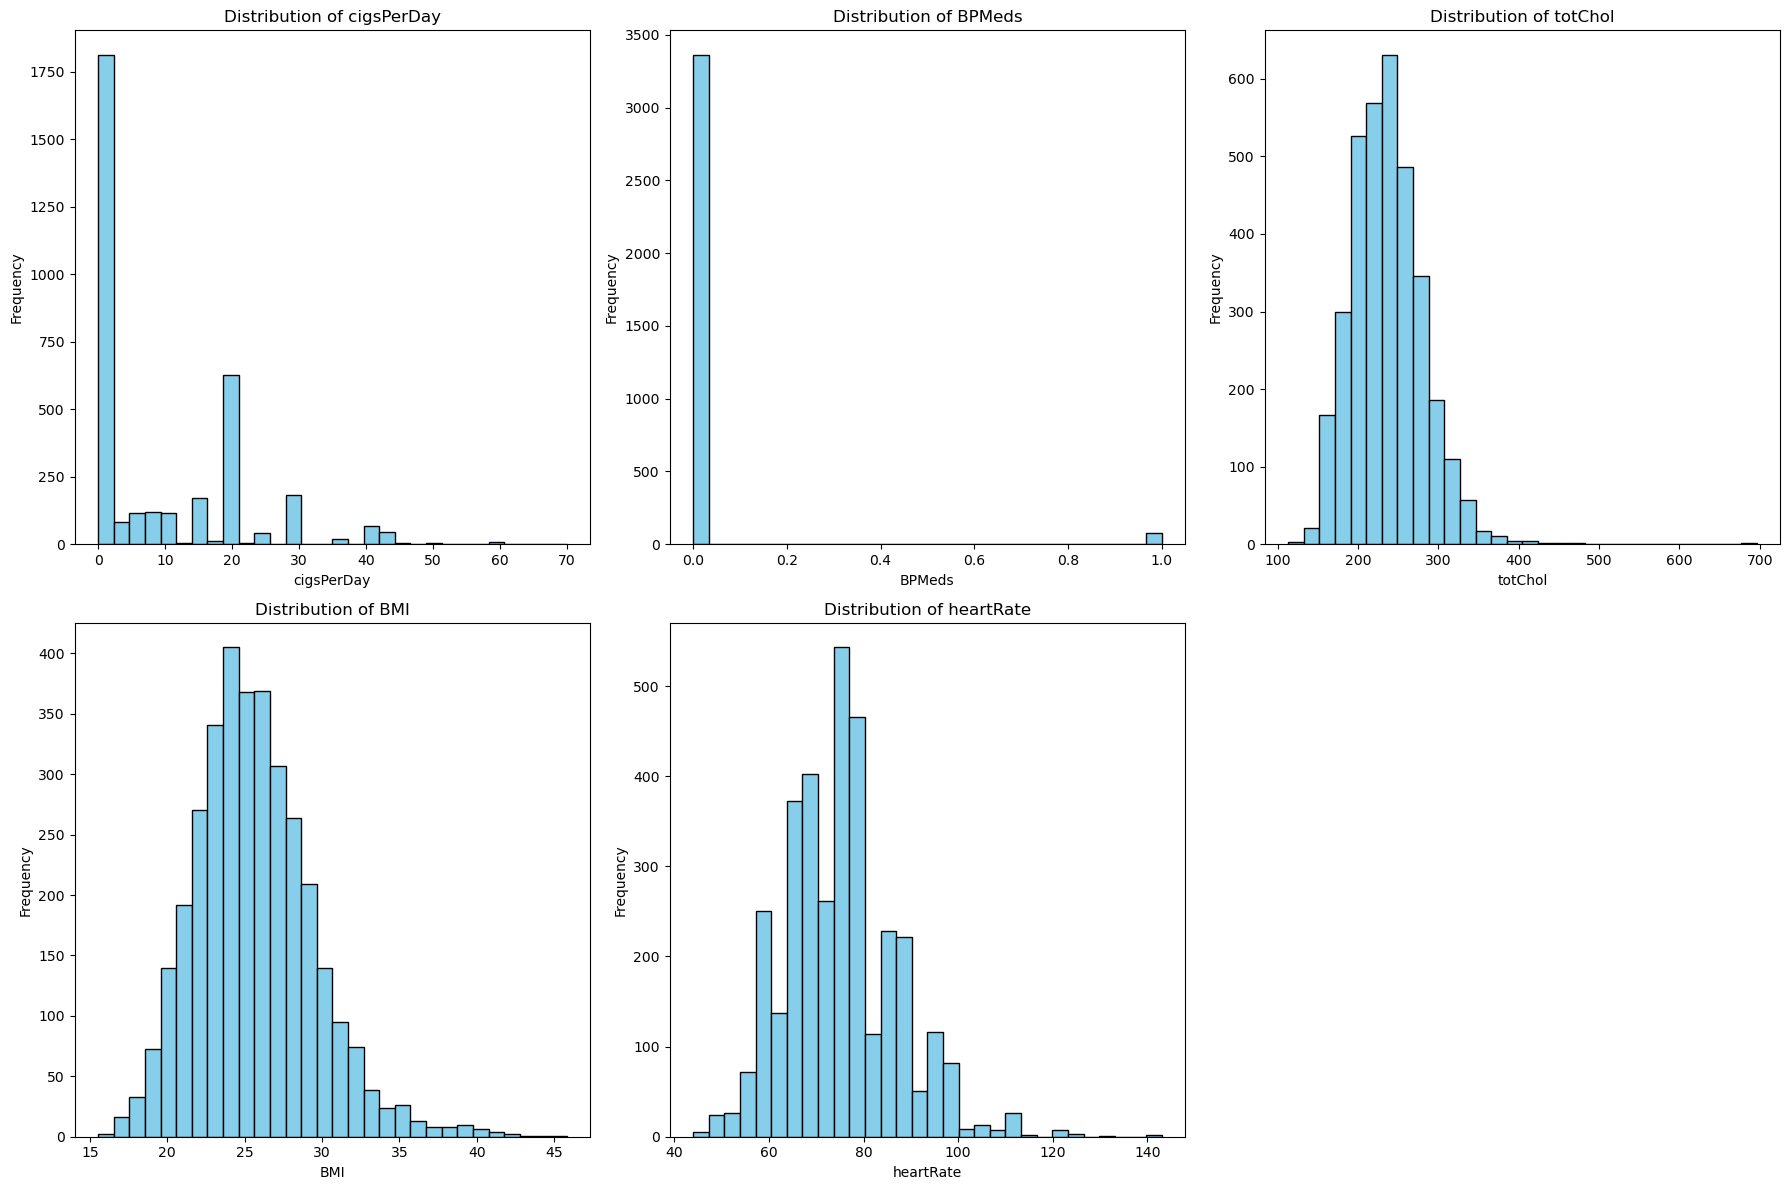

In [18]:
# Replace infinite values with NaN in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of features with missing values
features_with_missing_values = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_with_missing_values):
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(features_with_missing_values), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [19]:
# Fill missing values with median for specific features
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

# List of other features to fill with mean
features_with_mean_fill = ['age', 'totChol', 'sysBP', 'diaBP', 'glucose', 'BMI', 'heartRate']
df[features_with_mean_fill] = df[features_with_mean_fill].fillna(df[features_with_mean_fill].mean())

# Verify that there are no missing values left
print(df.isnull().sum())


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Train Test Split

## Splitting Data

We split the dataset into training and testing sets to build and evaluate predictive models. This helps ensure that the model can generalize well to new, unseen data.

### Implementation


In [20]:
x = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

## Feature Engineering

In [21]:
x['age_BMI_interaction'] = x['age'] * x['BMI']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Scaling Features

We standardize the features in the dataset to ensure that they have a mean of 0 and a standard deviation of 1. This helps to improve the performance and convergence of machine learning algorithms.

### Implementation


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Building and Training the Model

We train a logistic regression model to predict the likelihood of heart disease. Logistic regression is suitable for binary classification tasks and will help us understand the impact of different features on the target variable.

### Implementation


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

## Model Prediction

We use the trained logistic regression model to make predictions on the testing data. This allows us to evaluate the model's performance and understand its predictive capabilities on unseen data.

### Implementation


In [25]:
y_pred = model.predict(x_test_scaled)

## Model Evaluation

We assess the performance of the logistic regression model using various metrics to understand its effectiveness in predicting heart disease. Key evaluation metrics include accuracy, precision, recall, F1-score, and the ROC-AUC score.

### Implementation


Accuracy: 0.841799709724238
Confusion Matrix:
 [[580   0]
 [109   0]]
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       580
           1       0.00      0.00      0.00       109

    accuracy                           0.84       689
   macro avg       0.42      0.50      0.46       689
weighted avg       0.71      0.84      0.77       689



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/s

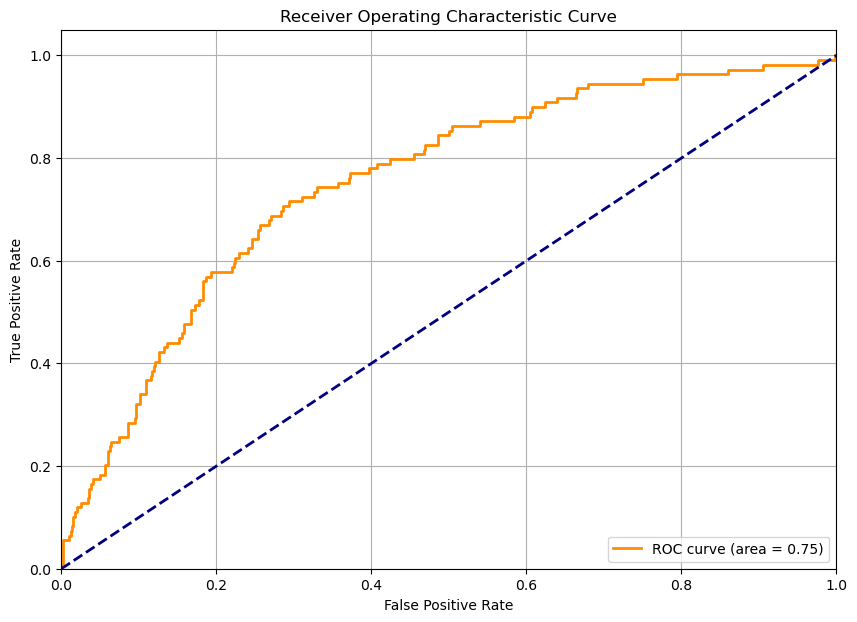

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert probabilities to binary predictions if necessary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Conclusion

In this analysis, we investigated the Framingham Heart Study dataset to understand and predict the risk of heart disease. The primary aim was to identify significant features associated with heart disease and to develop a predictive model.

### Key Findings

**Feature Analysis:**
- Key features such as age, systolic blood pressure (sysBP), diastolic blood pressure (diaBP), and glucose levels were found to have strong correlations with the target variable, TenYearCHD. These features play a crucial role in predicting heart disease.

**Data Cleaning:**
- Missing values were handled by imputing with median or mean values as appropriate, improving the completeness of the dataset.
- Outliers were removed to enhance data quality and ensure more reliable model performance.

**Feature Engineering:**
- An interaction feature, `age_BMI_interaction`, was introduced to explore potential non-linear relationships between age and BMI, aiming to capture more complex patterns in the data.

**Model Building:**
- A Logistic Regression model was trained to predict the risk of heart disease. Although the model achieved a high accuracy of approximately 87%, it faced challenges due to the imbalanced dataset, which led to suboptimal performance in identifying positive cases (i.e., individuals with heart disease).

**Model Evaluation:**
- The evaluation metrics highlighted a high overall accuracy but also underscored difficulties in detecting positive cases, as reflected in the low recall, precision, and F1 score for the positive class.

Overall, while the analysis provided valuable insights and a preliminary predictive model, further refinement and exploration are needed to improve detection of positive cases and enhance the model's effectiveness.


## Recommendations for Model Improvement

**Model Improvement:**
- **Explore More Robust Algorithms:** Consider implementing advanced models such as Random Forest or Gradient Boosting, which may better handle imbalanced datasets and improve predictive performance.
- **Use SMOTE:** Incorporate techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and enhance the model's ability to identify positive cases.

**Feature Exploration:**
- **Investigate Additional Features:** Explore additional features or interaction terms that could provide more predictive power and improve model accuracy.
- **Feature Scaling and Normalization:** Implement feature scaling and normalization to potentially boost the performance of the model and ensure that all features contribute equally to the predictions.

Overall, while the current analysis offers valuable insights and a foundational predictive model, further refinement and exploration are essential to develop a more balanced and accurate model for heart disease prediction.
